# Training 


In [1]:
import numpy as np
import pandas as pd
import os
import sys  
sys.path.append(".")

# deep learning
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
# produce vector inline graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

/opt/anaconda3/lib/python3.7/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/opt/anaconda3/lib/python3.7/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <3224DED3-FCE0-3B10-9D68-9EC019B2AFEC> /opt/anaconda3/lib/python3.7/site-packages/torchvision/image.so
  Expected in:     <7EC12623-0CF1-3739-8CBB-242EFC29E2B3> /opt/anaconda3/lib/python3.7/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


# Setup

In [2]:
# Check version of Pytorch
print(torch.__version__)

1.13.1


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Data


In [4]:
from data import data_cleaning

##  Training data tabular
# data_df = data_cleaning.create_feature_df()
data_df = pd.read_csv("../raw_data/tables/features.csv")
data_df

,Brand_Name,Brand_ID,Model_Name,Model_ID,Bodytype,Launch_Year,Color,Advertiser_ID,Image_ID,Viewpoint,file_path
0,Abarth,2,124 Spider,2_1,Convertible,2017,Blue,1,image_1.jpg,45,Abarth$$124 Spider$$2017$$Blue$$2_1$$1$$image_...
1,Abarth,2,124 Spider,2_1,Convertible,2017,Blue,10,image_11.jpg,45,Abarth$$124 Spider$$2017$$Blue$$2_1$$10$$image...
2,Abarth,2,124 Spider,2_1,Convertible,2017,Blue,10,image_16.jpg,0,Abarth$$124 Spider$$2017$$Blue$$2_1$$10$$image...
3,Abarth,2,124 Spider,2_1,Convertible,2017,Blue,10,image_18.jpg,270,Abarth$$124 Spider$$2017$$Blue$$2_1$$10$$image...
4,Abarth,2,124 Spider,2_1,Convertible,2017,Blue,10,image_2.jpg,180,Abarth$$124 Spider$$2017$$Blue$$2_1$$10$$image...
...,...,...,...,...,...,...,...,...,...,...,...
271318,Zenos,99,E10,99_1,Convertible,2016,Grey,3,image_7.jpg,90,Zenos$$E10$$2016$$Grey$$99_1$$3$$image_7.jpg
271319,Zenos,99,E10,99_1,Convertible,2016,Red,1,image_0.jpg,225,Zenos$$E10$$2016$$Red$$99_1$$1$$image_0.jpg
271320,Zenos,99,E10,99_1,Convertible,2016,Red,1,image_3.jpg,315,Zenos$$E10$$2016$$Red$$99_1$$1$$image_3.jpg
271321,Zenos,99,E10,99_1,Convertible,2016,Red,1,image_4.jpg,45,Zenos$$E10$$2016$$Red$$99_1$$1$$image_4.jpg


## training data (70%), validation set (10%), test data (20%)

In [5]:
from data.data_splitting import split_dataset_dfs

train_df, val_df, test_df = split_dataset_dfs("../raw_data/tables/features.csv")

In [6]:
train_df

,Brand_Name,Brand_ID,Model_Name,Model_ID,Bodytype,Launch_Year,Color,Advertiser_ID,Image_ID,Viewpoint,file_path
122,Abarth,2,595,2_4,Hatchback,2013,Black,100,image_0.jpg,45,Abarth$$595$$2013$$Black$$2_4$$100$$image_0.jpg
123,Abarth,2,595,2_4,Hatchback,2013,Black,100,image_1.jpg,0,Abarth$$595$$2013$$Black$$2_4$$100$$image_1.jpg
124,Abarth,2,595,2_4,Hatchback,2013,Black,100,image_10.jpg,135,Abarth$$595$$2013$$Black$$2_4$$100$$image_10.jpg
125,Abarth,2,595,2_4,Hatchback,2013,Black,100,image_11.jpg,135,Abarth$$595$$2013$$Black$$2_4$$100$$image_11.jpg
126,Abarth,2,595,2_4,Hatchback,2013,Black,100,image_18.jpg,180,Abarth$$595$$2013$$Black$$2_4$$100$$image_18.jpg
...,...,...,...,...,...,...,...,...,...,...,...
271318,Zenos,99,E10,99_1,Convertible,2016,Grey,3,image_7.jpg,90,Zenos$$E10$$2016$$Grey$$99_1$$3$$image_7.jpg
271319,Zenos,99,E10,99_1,Convertible,2016,Red,1,image_0.jpg,225,Zenos$$E10$$2016$$Red$$99_1$$1$$image_0.jpg
271320,Zenos,99,E10,99_1,Convertible,2016,Red,1,image_3.jpg,315,Zenos$$E10$$2016$$Red$$99_1$$1$$image_3.jpg
271321,Zenos,99,E10,99_1,Convertible,2016,Red,1,image_4.jpg,45,Zenos$$E10$$2016$$Red$$99_1$$1$$image_4.jpg


In [7]:
from typing import Callable
from skimage import io
from data import data_cleaning, year2label_fn, bodytype2label_fn, CarDataset


# set bucket_size for year -> how many years should correspond to one label?
year_bucket_size = 2
min_year = data_df["Launch_Year"].min()  # oldest car launch_year in data
max_year = data_df["Launch_Year"].max()  # # most recent car launch_year in data

car_dataset = CarDataset(
    train_df,
    lambda year: year2label_fn(
        year, min_year=min_year, max_year=max_year, year_bucket_size=year_bucket_size
    ),
    all_cars=True,
)

In [8]:
test_datapoint = car_dataset[1000]  # idx 10300 exists in small image dataset

In [9]:
test_datapoint

(array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

Year:  2007, Type: Convertible, viewpiont:180


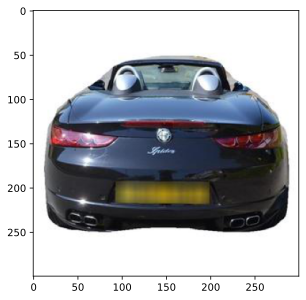

In [10]:
plt.imshow(test_datapoint[0])
print(
    f"Year:  {test_datapoint[-4]}, Type: {test_datapoint[-6]}, viewpiont:{test_datapoint[-1]}"
)

In [11]:
year2label_fn(2000, min_year=1990, max_year=2010, year_bucket_size=2)

4

In [12]:
bodytype2label_fn("Car Derived Van")

6

### Data augmentation and transformation:

In [13]:
from data.car_dataset import CarDataset, data_transforms, inverse_transform

data_transforms

{'train': Compose(
     ToTensor()
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
     ColorJitter(brightness=None, contrast=None, saturation=None, hue=None)
     RandomInvert(p=0.5)
     RandomPerspective(p=0.1)
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ),
 'val': Compose(
     ToTensor()
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 )}

In [14]:
seed_t = 123
torch.manual_seed(seed_t)

# load dataset
# create torch.dataset --> specify transform arguement accordingly

train_set = CarDataset(
    features=train_df[:100],
    transform=data_transforms["train"],
    year2label_fn=lambda year: year2label_fn(
        year, min_year=min_year, max_year=max_year, year_bucket_size=year_bucket_size
    ),
)

test_set = CarDataset(
    features=test_df[:100],
    transform=data_transforms["val"],
    year2label_fn=lambda year: year2label_fn(
        year, min_year=min_year, max_year=max_year, year_bucket_size=year_bucket_size
    ),
)

val_set = CarDataset(
    features=val_df[:100],
    transform=data_transforms["val"],
    year2label_fn=lambda year: year2label_fn(
        year, min_year=min_year, max_year=max_year, year_bucket_size=year_bucket_size
    ),
)


# data loaders for all train, test, val datasets
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=len(test_set), shuffle=True
)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=len(val_set), shuffle=True)

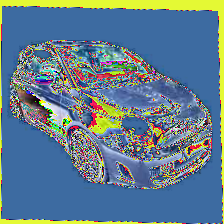

In [15]:
test_point_transf = train_set[0]
post_transf = torchvision.transforms.functional.to_pil_image(test_point_transf[0])
inv_transf = torchvision.transforms.functional.to_pil_image(
    inverse_transform(test_point_transf[0])
)
post_transf

In [16]:
(train_set[10])

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044,

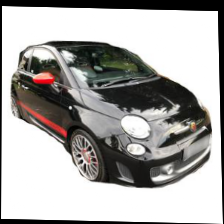

In [17]:
inv_transf

In [18]:
test_point_transf[0]

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ...,  2.2489,  1.8984, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ...,  2.2489,  2.1012, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ...,  2.0461,  2.2457, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ...,  2.4286,  2.0703, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ...,  2.4286,  2.2776, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ...,  2.2212,  2.4253, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

In [19]:
train_df.columns

Index(['Brand_Name', 'Brand_ID', 'Model_Name', 'Model_ID', 'Bodytype',
       'Launch_Year', 'Color', 'Advertiser_ID', 'Image_ID', 'Viewpoint',
       'file_path'],
      dtype='object')

In [20]:
# dataset dic
data_set_dic = dict({"train": train_set, "val": val_set, "test": test_set})

# dataloader dic

dataloader_dic = dict({"train": train_loader, "val": val_loader, "test": test_loader})

#  a dataloader has  the following attributes:
# image, bodytype, model_id, launch_year, self.bodytype2label_fn(bodytype), self.year2label_fn(year=launch_year), viewpoint

In [21]:
len(next(iter(train_loader))[0])

32

## Model

In [22]:
from models import get_fine_tuneable_model


# compute number of classes of final layer which depends on year_bucket size and year_range
year_range = max_year - min_year
num_year_classes = 1 + (year_range // year_bucket_size)  # floor division

my_model = get_fine_tuneable_model(num_classes=num_year_classes)

/opt/anaconda3/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/opt/anaconda3/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Replace final layer of Resnet18 with a new fully connected layer with number of features equal to the number of output classes and initialize with random weights.


## Tensorboard visualizations
see: https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html

In [23]:
# from torch.utils.tensorboard import SummaryWriter

# # default `log_dir` is "runs" - we'll be more specific here
# writer = SummaryWriter('runs/0_experiment_car_year_classifcation')